In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
# Step 2: Enable interactive mode for Jupyter Notebook
%matplotlib inline
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:0.6f}"})

In [2]:
df = pd.read_excel('data7.xlsx')

In [3]:
df

,x1,x2,x3,x4,x5,x6,y,Notes
0,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968,NaN
1,0.881647,0.204450,0.414474,0.420385,0.264915,0.730660,0.675142,NaN
2,0.148647,0.033943,0.728806,0.316066,0.021769,0.516918,0.611526,NaN
3,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433,NaN
4,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753,NaN
5,0.066611,0.528045,0.816095,0.961017,0.086509,0.777788,0.516457,NaN
6,0.175978,0.624416,0.295542,0.469553,0.097770,0.728141,0.475396,NaN
7,0.417626,0.064100,0.245669,0.559041,0.191531,0.254641,0.274893,NaN
8,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047,NaN
9,0.942451,0.377440,0.486122,0.228791,0.082632,0.711958,0.268400,NaN


In [4]:
df = df.drop(columns=['Notes'])
df=df.dropna()

In [5]:
# two highest points in top_2_indices will have color in red
top_2_indices = df['y'].nlargest(2).index
top_qntl_index = df['y'].nlargest(8).index
colors = np.full(df.shape[0], 'b', dtype=object)  # Default color is blue
colors[top_qntl_index] = 'y'
colors[top_2_indices] = 'r'  # Color top points red

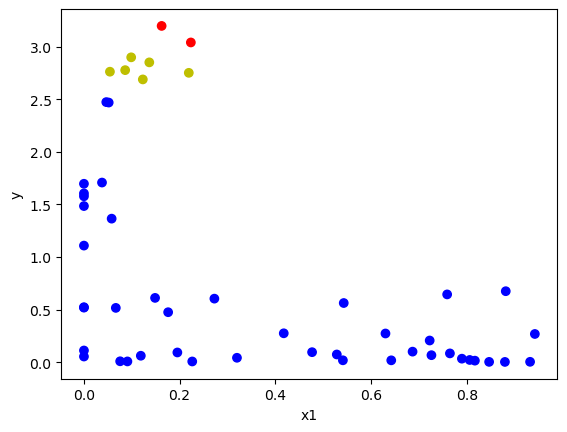

In [6]:
plt.scatter(df['x1'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x1')
plt.show()

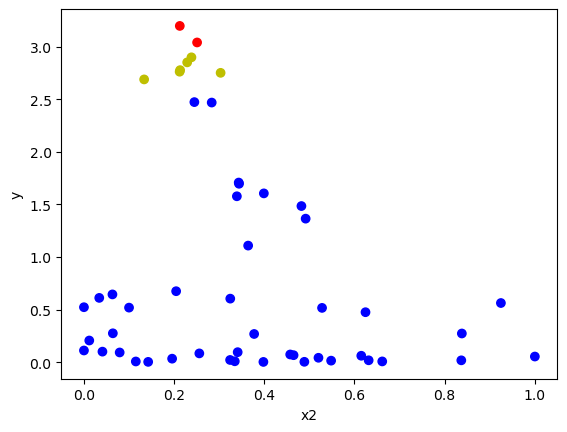

In [7]:
plt.scatter(df['x2'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x2')
plt.show()

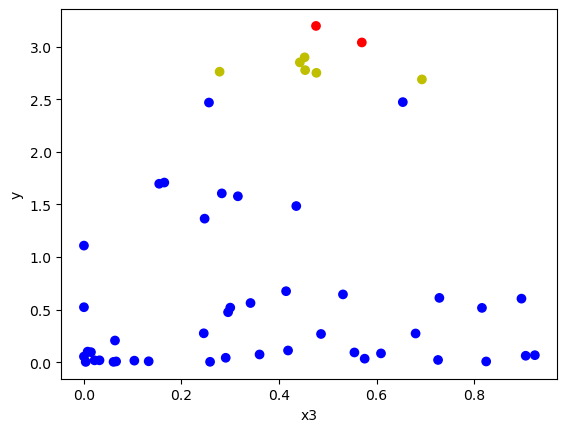

In [8]:
plt.scatter(df['x3'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x3')
plt.show()

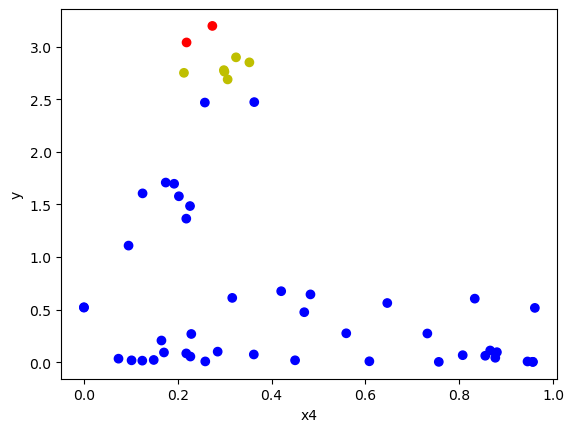

In [9]:
plt.scatter(df['x4'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x4')
plt.show()

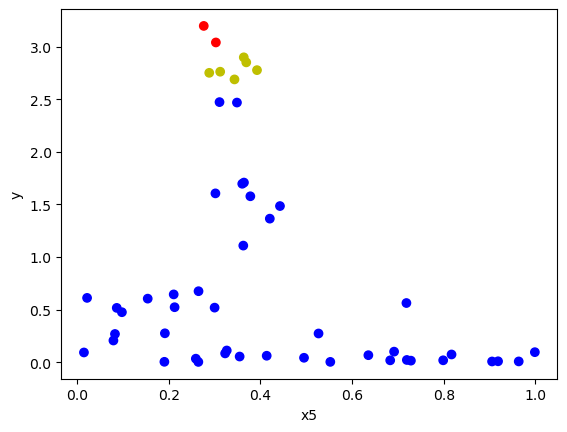

In [10]:
plt.scatter(df['x5'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x5')
plt.show()

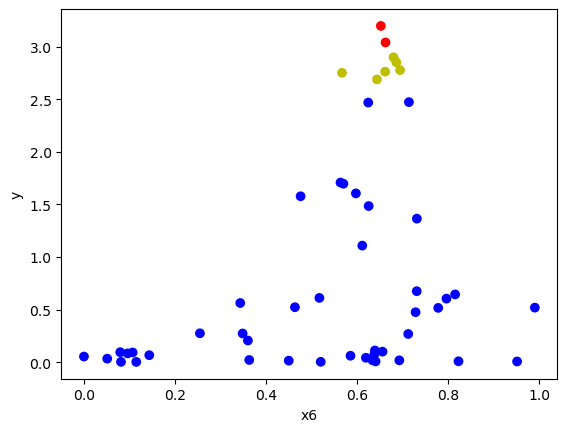

In [11]:
plt.scatter(df['x6'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x6')
plt.show()

<IPython.core.display.Javascript object>


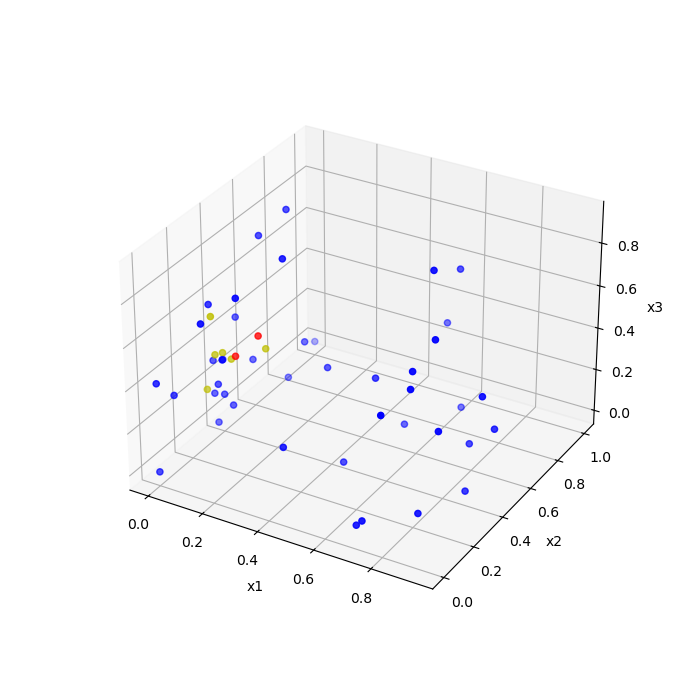

In [12]:
%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.scatter(df['x1'], df['x2'], df['x3'], c = colors)
# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
# Display the plot
plt.show()

In [13]:
%matplotlib inline

# Build the grid

In [14]:
x = np.linspace(0,0.999999,20).reshape(-1,1)

In [15]:
x_grid = np.array([[x1, x2, x3, x4, x5, x6] for x1 in x for x2 in x for x3 in x for x4 in x for x5 in x for x6 in x ])

In [16]:
x_grid = x_grid.squeeze()

In [17]:
X = df.iloc[:,:-1].to_numpy()

In [18]:
y = df.iloc[:,-1].to_numpy()

# Use Gaussian Process Regressor with Radial Based Function 

In [19]:
kernel = RBF(length_scale = 0.3, length_scale_bounds=(1e-2 , 1e3))
bo_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-11, n_restarts_optimizer=500, normalize_y=True)

In [20]:
bo_model.fit(X, y)

GaussianProcessRegressor(alpha=1e-11, kernel=RBF(length_scale=0.3),
                         n_restarts_optimizer=500, normalize_y=True)

In [21]:
# Check that predicted values are equal originals - this is just a control point
#np.column_stack( (y,bo_model.predict(X)) )

In [24]:
bo_model.kernel_.length_scale

0.3695512239825794

In [25]:
# Predict for the grid
post_mean, post_std = bo_model.predict(x_grid, return_std=True)

In [26]:
# Define acquiring function
a_fun = post_mean + 1 * post_std # <- The value of 1 was taken intentionally as we are in exploiting mode
print('Current max point =', max(post_mean))

Current max point = 3.1996606368213194


In [27]:
# Find the index and maximum value of acquiring function
i = np.argmax(a_fun)
print('The maximum of acquiring function is', a_fun[i],'the max index is',i)
print('post_mean =', post_mean[i],' post_std =', post_std[i])
print('the next point for Bayesian Optimization is',x_grid[i])

The maximum of acquiring function is 3.254073417535404 the max index is 10306093
post_mean = 3.1576344287375897  post_std = 0.0964389887978144
the next point for Bayesian Optimization is [0.157895 0.210526 0.421052 0.263158 0.210526 0.684210]


In [28]:
# I would like to find out the points even better than grid
# I use optimize.minimize function over bayesian predictor
# This piece of code is useful for multi-dimentionsfrom scipy.optimize import minimizefrom scipy.optimize import minimize
def aquisition_fun(x):
    x = np.atleast_2d(x)
    post_mean, post_std = bo_model.predict(x, return_std=True)
    return -(post_mean + 1 * post_std)
result = minimize(aquisition_fun, x_grid[i], bounds=[(0, 0.999999)]*6, tol=1e-8)
optimal_point = result.x
optimal_value = -result.fun
print(f"Expected value {optimal_value:0.6f}")
print("at point", optimal_point)

Expected value 3.264359
at point [0.171814 0.218889 0.434886 0.266445 0.225800 0.702206]


In [29]:
# The distance from current max point
np.linalg.norm(optimal_point - X[top_2_indices[0]])

0.08331237800512975

# Make another try with Gaussian Process Regressor and different RBF kernel

In [30]:
kernel = RBF(length_scale = (0.3,0.3,0.3,0.3,0.3,0.3), length_scale_bounds=(1e-2 , 1e3))
bo2_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-11, n_restarts_optimizer=500, normalize_y=True)

In [31]:
bo2_model.fit(X, y)

/home/agodunov/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 4 of parameter length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=1e-11,
                         kernel=RBF(length_scale=[0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
                         n_restarts_optimizer=500, normalize_y=True)

In [32]:
bo2_model.kernel_.length_scale

array([0.601894, 0.138998, 0.702144, 2.019312, 1000.000000, 0.173883])

In [33]:
# Predict for the grid
post_mean, post_std = bo2_model.predict(x_grid, return_std=True)

In [34]:
# Define acquiring function
a_fun = post_mean + 2 * post_std # <- The value of 1 is taken intentionally as we are in exploiting mode
print('Current max point =',max(post_mean))

Current max point = 3.628048292259775


In [35]:
# Find the index and maximum value of acquiring function
i = np.argmax(a_fun)
print('The maximum of acquiring function is', a_fun[i],'the max index is',i)
print('post_mean =', post_mean[i],' post_std =', post_std[i])
print('the next point for Bayesian Optimization is',x_grid[i])

The maximum of acquiring function is 4.317088379346454 the max index is 3967991
post_mean = 3.543151354745216  post_std = 0.38696851230061907
the next point for Bayesian Optimization is [0.052632 0.210526 0.789473 0.999999 0.999999 0.578947]


In [36]:
# I would like to find out the points even better than grid
# I use optimize.minimize function over bayesian predictor
# This piece of code is useful for multi-dimentionsfrom scipy.optimize import minimizefrom scipy.optimize import minimize
def aquisition_fun(x):
    x = np.atleast_2d(x)
    post_mean, post_std = bo2_model.predict(x, return_std=True)
    return -(post_mean + 2 * post_std)
result = minimize(aquisition_fun, x_grid[i], bounds=[(0, 0.999999)]*6, tol=1e-8)
optimal_point = result.x
optimal_value = -result.fun
print(f"Expected value {optimal_value:0.6f}")
print("at point", optimal_point)

Expected value 4.344724
at point [0.072737 0.227150 0.802216 0.999999 0.999999 0.578836]


In [37]:
# The distance from current max point
np.linalg.norm(optimal_point - X[top_2_indices[0]])

1.082306146900801

# Find the next point based on gradient in max point

In [71]:
# Find the maximum value in y and its index
max_index = top_2_indices[0]
max_value = y[max_index]
print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)
#print('Distances', distances)
# Sort the distances and get the indices of the closest neighbors (excluding itself)
# THE NUMBER OF POINTS IS EQUIAL TO THE TOTAL DIMENTIONALITY
closest_indices = np.argsort(distances)[1:7] #<-fine tune this number!
# Indices of the three points (max point + two closest neighbors)
indices_to_use = np.concatenate(([max_index], closest_indices))
#print('indices to use', indices_to_use)
# Show overage distance of closest points. Step should not be far away
mean_dist = distances[indices_to_use].mean()
print("Average distance",mean_dist)
# Extract the points and their corresponding y values
X_selected = X[indices_to_use]
y_selected = y[indices_to_use]
# Fit a linear hyperplane using the selected points
l2_model = LinearRegression()
l2_model.fit(X_selected, y_selected, sample_weight = 10/(1 + 10 * distances[indices_to_use]/mean_dist))
#l2_model.fit(X_selected, y_selected)
coefficients = l2_model.coef_
intercept = l2_model.intercept_
# Calculate the covariance matrix of the feature matrix X
cov_matrix = np.cov(X_selected, rowvar=False)
# Calculate the determinant of the covariance matrix
det_cov_matrix = np.linalg.det(cov_matrix)
print("Determinant of the covariance matrix should not be 0:", det_cov_matrix)
# Define the maximum point
max_point = X[max_index]
# Calculate the gradient of the hyperplane
gradient = coefficients
# Define the distance to move along the gradient direction
distance = 0.1
# Normalize the gradient to unit length
gradient_unit = gradient / np.linalg.norm(gradient)
# Move from the maximum point in the direction of the gradient by the specified distance
highest_point_on_hyperplane = np.clip(max_point + distance * gradient_unit, 0, 0.999999)
# Calculate the y value at this highest point
highest_y_value_on_hyperplane = l2_model.predict([highest_point_on_hyperplane])[0]
print("X selected points, Y selected, Distance from max")
print(np.column_stack( (X_selected, y_selected, distances[indices_to_use])))
print("Y selected, Y predicted, Distance from max")
print(np.column_stack( (y_selected, l2_model.predict(X_selected), distances[indices_to_use])))
print("Highest point on hyperplane within",distance,"distance:", highest_point_on_hyperplane)
print("Highest y value on hyperplane within",distance,"distance:", highest_y_value_on_hyperplane)
print("Gradient",gradient)
point1 = highest_point_on_hyperplane
# Check the model score, it should be close to 1
l2_model.score(X_selected, y_selected)

max value = 3.19744278507265
Average distance 0.1319655465049223
Determinant of the covariance matrix should not be 0: 2.3375046539306007e-19
X selected points, Y selected, Distance from max
[[0.162365 0.212568 0.475814 0.273662 0.276328 0.651893 3.197443 0.000000]
 [0.098734 0.238403 0.452440 0.324089 0.363632 0.679634 2.898862 0.127268]
 [0.223440 0.250920 0.569777 0.218686 0.302785 0.662149 3.040258 0.133632]
 [0.136601 0.228927 0.442688 0.352601 0.369039 0.685880 2.850953 0.134203]
 [0.086155 0.213263 0.453539 0.298236 0.392469 0.694077 2.777093 0.148919]
 [0.219140 0.303081 0.476635 0.213144 0.288279 0.566581 2.751408 0.150000]
 [0.054310 0.212217 0.278162 0.299424 0.312161 0.661318 2.762160 0.229736]]
Y selected, Y predicted, Distance from max
[[3.197443 3.197443 0.000000]
 [2.898862 2.898862 0.127268]
 [3.040258 3.040258 0.133632]
 [2.850953 2.850953 0.134203]
 [2.777093 2.777093 0.148919]
 [2.751408 2.751408 0.150000]
 [2.762160 2.762160 0.229736]]
Highest point on hyperplane w

1.0

In [72]:
# See the distance from max point
np.linalg.norm(highest_point_on_hyperplane - X[top_2_indices[0]])

0.10000000000000003

In [73]:
# See covariance matrix to control multicolinearity
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[0.004280 0.001536 0.004523 -0.002544 -0.001688 -0.001707]
 [0.001536 0.001067 0.001172 -0.001093 -0.000522 -0.001161]
 [0.004523 0.001172 0.007554 -0.002164 -0.000446 -0.000448]
 [-0.002544 -0.001093 -0.002164 0.002690 0.001654 0.001602]
 [-0.001688 -0.000522 -0.000446 0.001654 0.002039 0.001339]
 [-0.001707 -0.001161 -0.000448 0.001602 0.001339 0.001828]]


In [74]:
# Check Bayesian model
bo_model.predict(highest_point_on_hyperplane.reshape(1, -1))

array([3.034633])

In [75]:
l2_model.predict([highest_point_on_hyperplane])

array([3.828666])

In [76]:
#weights of points
10/(1 + 10 * distances[indices_to_use]/mean_dist)

array([10.000000, 0.939494, 0.898771, 0.895289, 0.814024, 0.808628,
       0.543218])

In [77]:
# Do prinicple components analysis of data seleted for plain surface
from sklearn.decomposition import KernelPCA, PCA
pca = PCA(n_components = 6)
X_lin = pca.fit(X_selected)
X_lin.explained_variance_ratio_

array([0.673812, 0.234396, 0.051658, 0.030731, 0.006920, 0.002483])

# Aproximate by quadratic polinome at max point

In [45]:
# Auxiliary function, returns number of needed point to build the plain in n dimention 
def num_of_nonl_param(n):
    # function returns the number of minimum points for quadratic polynomal
    n = np.array(n)
    return int(1 + 2 * n + n * (n-1) / 2)

In [46]:
# prepare data for 2 order polynom
poly = PolynomialFeatures(2, include_bias = False)
XN = poly.fit_transform(X)

In [47]:
max_index=np.argmax(y) 
max_value = y[max_index]
#print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)

In [48]:
def apprF(n):
    # Sort the distances and get the indices of the two closest neighbors (excluding itself)
    # THE NUMBER OF POINTS IS EQUIAL TO THE TOTAL DIMENTIONALITY!!!
    closest_indices = np.argsort(distances)[1:n]
    # Indices of the three points (max point + two closest neighbors)
    indices_to_use = np.concatenate(([max_index], closest_indices))
    #print('indices to use', indices_to_use)
    # Show overage distance of closest points. Step should not be far away
    print("Average distance",distances[indices_to_use].mean())
    # Extract the points and their corresponding y values
    XN_selected = XN[indices_to_use]
    y_selected = y[indices_to_use]
    # print(X_selected)
    # Fit a linear hyperplane using the selected points
    lreg = LinearRegression()
    lreg.fit(XN_selected, y_selected)
    print("Score =",lreg.score(XN_selected,y_selected))
    print("Normalized error =", np.linalg.norm(y_selected - lreg.predict(XN_selected)))
    print("Y        , Prediction, Distance")
    print(np.column_stack( (y_selected, lreg.predict(XN_selected), distances[indices_to_use]) ))
    return lreg

In [49]:
num_of_nonl_param(6)

28

In [50]:
lreg = apprF(48) #<- Fine tune this number so solution will be stable

Average distance 0.6257172317674581
Score = 0.8714063523710365
Normalized error = 2.656900547312045
Y        , Prediction, Distance
[[3.197443 2.459719 0.000000]
 [2.898862 2.601165 0.127268]
 [3.040258 2.393411 0.133632]
 [2.850953 2.601556 0.134203]
 [2.777093 2.725352 0.148919]
 [2.751408 2.351984 0.150000]
 [2.762160 2.029490 0.229736]
 [2.473085 2.474057 0.243058]
 [2.688845 2.971230 0.246173]
 [2.468820 2.049813 0.267724]
 [1.577756 2.210449 0.338361]
 [1.605240 1.580407 0.352397]
 [1.484804 1.985871 0.362463]
 [1.708196 1.745117 0.393404]
 [1.696603 1.564155 0.409191]
 [1.364968 1.554136 0.413617]
 [0.611526 1.167951 0.425343]
 [0.518947 0.981836 0.509620]
 [0.475396 1.094811 0.527610]
 [1.108761 0.874208 0.562792]
 [0.274893 0.499928 0.621779]
 [0.092645 -0.360715 0.633158]
 [0.522869 0.876299 0.642239]
 [0.111493 0.364611 0.654316]
 [0.644652 0.563046 0.675370]
 [0.073516 0.933245 0.712479]
 [0.675142 0.530039 0.740984]
 [0.604433 1.090321 0.742061]
 [0.042118 0.425126 0.75247

In [51]:
X0 = X[max_index,:] 

In [52]:
def opt_fun(x):
    polynom = poly.fit_transform(x.reshape(1, -1))
    return -lreg.predict(polynom)

In [53]:
# define bounds as the solution is not stable!
step = 0.5
bnds = []
for i in range(0,len(X0)): bnds.append( (max(X0[i]-step,0), min(X0[i]+step,0.999999)) )
print('Bonds\n', np.array(bnds))

Bonds
 [[0.000000 0.662365]
 [0.000000 0.712568]
 [0.000000 0.975814]
 [0.000000 0.773662]
 [0.000000 0.776328]
 [0.151893 0.999999]]


In [54]:
result = minimize(opt_fun, X0, bounds=bnds, tol=1e-5)

In [55]:
print('The next point is',result.x)
print(f'Estimated value {result.fun:0.3f}')

The next point is [0.000000 0.000000 0.653961 0.144464 0.776328 0.151893]
Estimated value -7.554


In [56]:
# quadratic polynom does not fit well for 7th function